In [332]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [396]:
df = pd.read_csv('train.csv')

In [266]:
test = pd.read_csv('test.csv')

In [397]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [268]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Solving issues with empty values 

<Axes: xlabel='Age', ylabel='Count'>

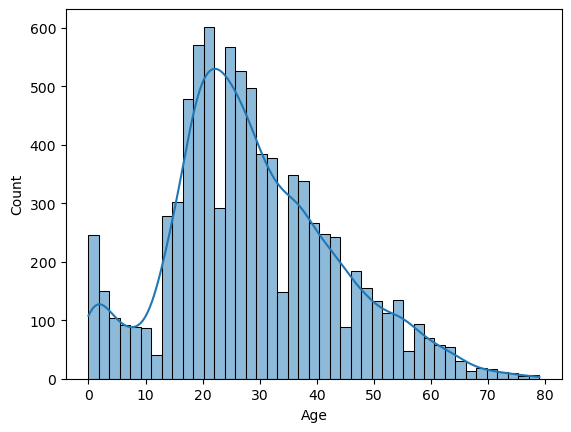

In [269]:
sns.histplot(data=df, x='Age', kde=True)

In [270]:
df.Age.fillna(df.Age.mode().iloc[0], inplace=True)
test.Age.fillna(test.Age.mode().iloc[0], inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

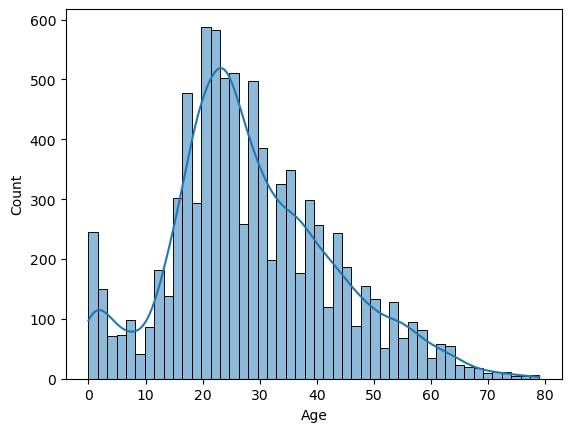

In [271]:
sns.histplot(data=df, x='Age', kde=True)

## Checking HomePlanets and Destinations

Text(0.5, 1.0, 'HomePlantes')

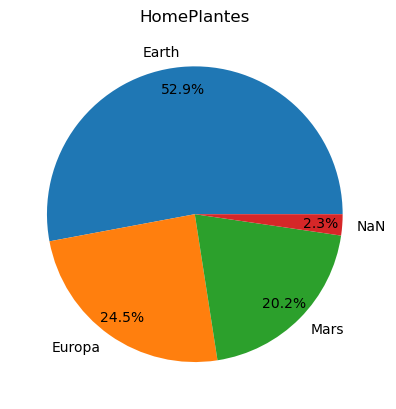

In [272]:
labels, values = df.HomePlanet.value_counts().keys(), df.HomePlanet.value_counts().values
# The variables above doesn't include empty // NaN values, adding them for better representation 
labels = labels.tolist()
labels.append('NaN')
values = values.tolist()
values.append(df[df.HomePlanet.isna()].shape[0])

plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=.85)
plt.title('HomePlantes')


<Axes: xlabel='Age', ylabel='HomePlanet'>

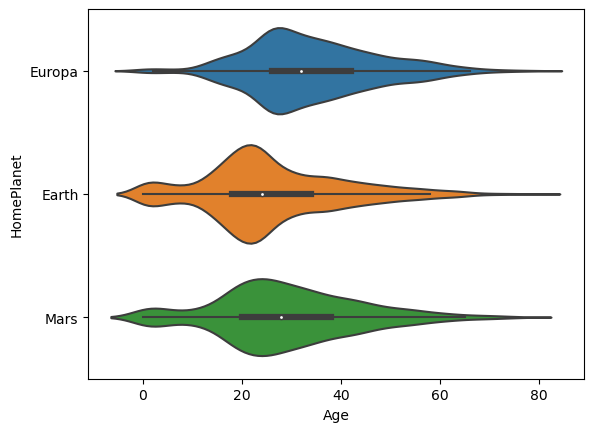

In [273]:
sns.violinplot(data=df, x='Age', y='HomePlanet')

Text(0.5, 1.0, 'Transported from planets')

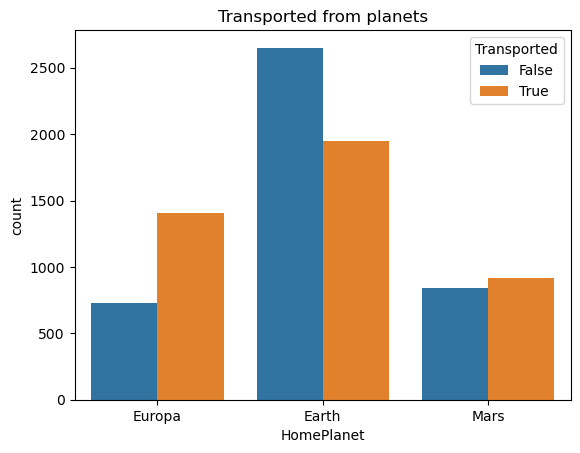

In [274]:
sns.countplot(data=df, x="HomePlanet", hue='Transported')
plt.title('Transported from planets')

Text(0.5, 1.0, 'Transported to planets')

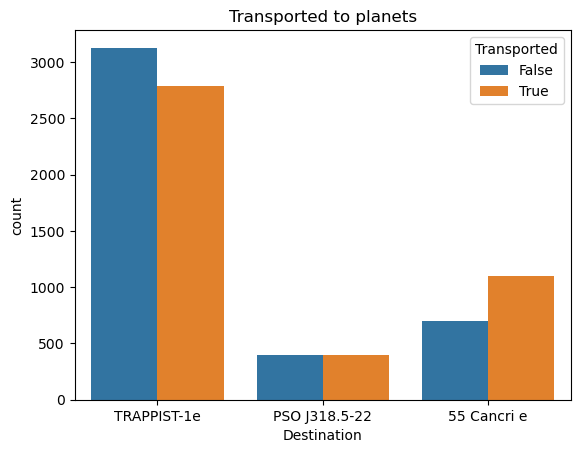

In [275]:
sns.countplot(data=df, x='Destination', hue='Transported')
plt.title('Transported to planets')

## Checking VIP

<Axes: xlabel='VIP', ylabel='count'>

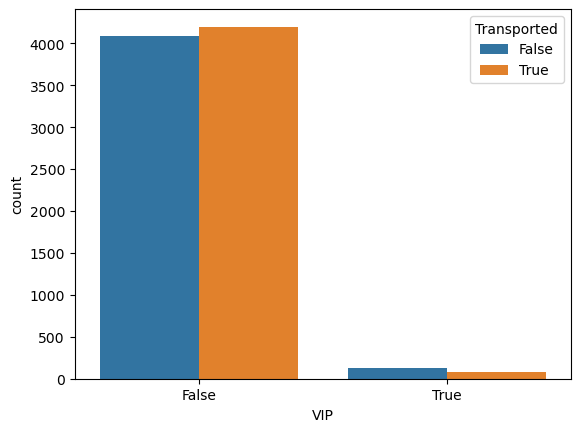

In [276]:
sns.countplot(data=df, x='VIP', hue='Transported')

### Dropping features that don't seem relevant / necessary from train and test files 

In [277]:
df.drop(columns=['VIP', 'Name', 'PassengerId'], inplace=True)

test.drop(columns=['VIP','Name'], inplace=True)
test.set_index('PassengerId',inplace=True)

## Checking CryoSleep 


<Axes: xlabel='CryoSleep', ylabel='count'>

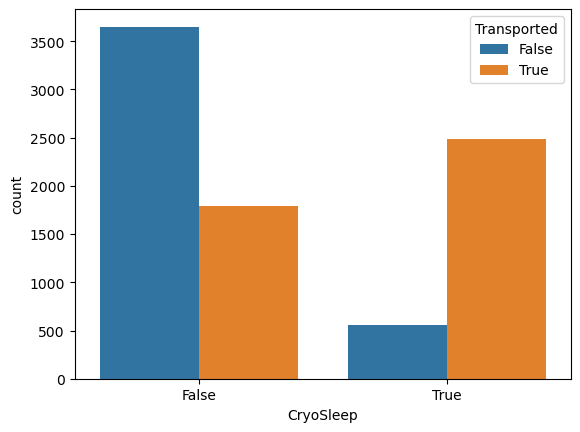

In [278]:
sns.countplot(data=df, x='CryoSleep', hue='Transported')

## Cabin feature can be splitted in three different features

In [279]:
df['Cabin'].fillna(df.Cabin.mode().iloc[0], inplace=True)
test['Cabin'].fillna(test.Cabin.mode().iloc[0], inplace=True)

df['HomePlanet'].fillna(df.HomePlanet.mode().iloc[0], inplace=True)
test['HomePlanet'].fillna(test.HomePlanet.mode().iloc[0], inplace=True)

df['Destination'].fillna(df.Destination.mode().iloc[0], inplace=True)
test['Destination'].fillna(test.Destination.mode().iloc[0], inplace=True)

df[['Deck', 'Num', 'Side']] = df.Cabin.str.split(r'/', expand=True)
test[['Deck', 'Num', 'Side']] = test.Cabin.str.split(r'/', expand = True)

df.drop(columns=['Cabin','Num'], inplace=True)
test.drop(columns=['Cabin', 'Num'], inplace=True)

### Filling NaNs in rest DF

In [280]:
columns = ['CryoSleep', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa', 'RoomService']

In [281]:
df[columns] = df[columns].fillna(0)
test[columns] = test[columns].fillna(0)

### Converting boolian to ints

In [282]:
df['CryoSleep'] = df.CryoSleep.astype(int)
df['Transported'] = df.Transported.astype(int)

In [283]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   RoomService   4277 non-null   float64
 5   FoodCourt     4277 non-null   float64
 6   ShoppingMall  4277 non-null   float64
 7   Spa           4277 non-null   float64
 8   VRDeck        4277 non-null   float64
 9   Deck          4277 non-null   object 
 10  Side          4277 non-null   object 
dtypes: float64(6), object(5)
memory usage: 401.0+ KB


In [284]:
y_target = df.Transported
df.drop(columns='Transported', inplace=True)

## Encoding categorical features, training and testing different models 

#### <i> Transforming categorical values in training dataset with scaling numerical values in test dataset</i>

In [285]:
cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck','Side']
scaling_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [286]:
ct = ColumnTransformer([
    ('scaling', StandardScaler(), scaling_columns),
    ('onehot', OneHotEncoder(sparse_output=False), cat_columns)])

In [287]:
ct.fit(df)
df_transf = ct.transform(df)
df_transf.shape

(8693, 23)

In [288]:
test_transf = ct.transform(test)
test_transf.shape

(4277, 23)

## Fitting models and comparing cross val score

In [388]:
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=3, random_state=25)
linear = LogisticRegression(random_state=25)

In [323]:
kfold = KFold(n_splits=5, shuffle=True, random_state=25)

In [389]:
cross_val_score(rf, df_transf, y_target, cv=kfold)

array([0.786659  , 0.78550891, 0.80908568, 0.81242808, 0.80897583])

In [327]:
cross_val_score(linear, df_transf, y_target, cv=kfold)

array([0.78723404, 0.78723404, 0.79355952, 0.78998849, 0.79804373])

In [335]:
X_train, X_test, y_train, y_test = train_test_split(df_transf, y_target)

In [390]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=300, random_state=25)

In [391]:
rf.score(X_test, y_test)

0.8100275988960441

In [393]:
predictions = rf.predict(test_transf)

In [394]:
submission = pd.DataFrame({'PassengerId':test.index,
                           'Transported':predictions.astype(bool)}).to_csv('submission.csv', index=False)